In [1]:
#main imports
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import acquire
import os
import scipy
import scipy.stats as stats
import sklearn.impute as simpleImputer

#partial imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures,QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE, f_regression, SelectKBest

#custom imports
import acquire

In [2]:
df = acquire.get_zguide()
germany_df = acquire.get_opsd_germany()

In [3]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                261 non-null    object 
 1   coffee_consumption  261 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [6]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                261 non-null    datetime64[ns]
 1   coffee_consumption  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [8]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [9]:
del df['year']
del df['day']
del df['month']
del df['weekday']

In [10]:
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [11]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [12]:
df['2019-05']

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_21181/3193820371.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05']


,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543


In [13]:
df['2019-05-06':'2019-05-16'] # NB. inclusive

,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


In [14]:
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


In [15]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


In [16]:
df = df.fillna(0)

In [17]:
df.resample('3W').mean() # Every 3 weeks

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [18]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


<AxesSubplot:xlabel='date'>

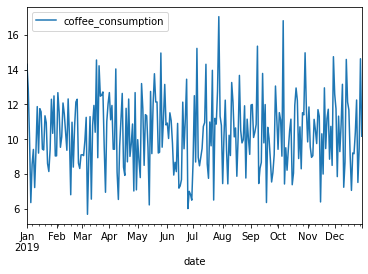

In [19]:
df.plot()

<AxesSubplot:xlabel='date'>

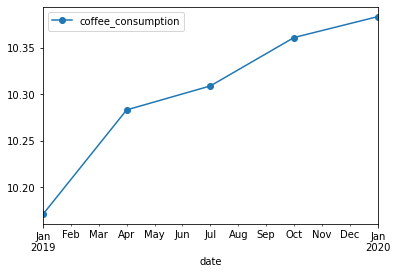

In [20]:
df.resample('3M').mean().plot(marker='o')

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,9.277212,NaN,NaN,NaN
2019-01-20,10.265097,10.148156,NaN,NaN
2019-01-27,9.690260,9.744190,NaN,NaN
2019-02-03,10.639508,10.198289,10.154847,NaN
2019-02-10,11.195485,10.508418,10.213512,NaN
2019-02-17,10.730911,10.855301,10.504252,10.385805
2019-02-24,9.808429,10.578275,10.412919,10.229557
2019-03-03,9.486304,10.008548,10.372127,10.259428


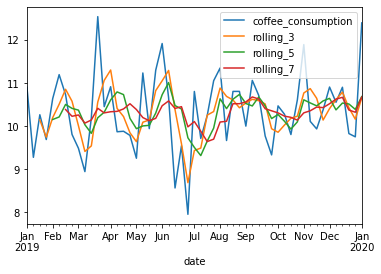

In [21]:
#The .rolling method can be used to calculate rolling averages. 
# A rolling average lets us answer questions like: 
# what was the average over the last 3 days? For every day in our dataset.

rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [22]:
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,40.134728
2019-02-03,39.872077
2019-02-10,41.790351
2019-02-17,42.256164
2019-02-24,42.374333
2019-03-03,41.221128


In [23]:
#.shift: move the data backwards and forwards by a given amount
#.diff: find the difference with the previous observation (or a specified further back observation)

df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,9.410101,6.354805,12.905900,2.190757,-4.360337
2019-01-08,9.410101,7.219271,8.545563,10.046015,0.864539,-0.635914
2019-01-09,7.219271,9.338456,9.410101,6.354805,-2.190831,0.864465
2019-01-10,9.338456,11.872667,7.219271,8.545563,2.119186,0.792894
2019-01-11,11.872667,9.198816,9.338456,9.410101,2.534210,2.462566


In [24]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [25]:

#The strftime method can be used to format dates in a 
# custom way using format specifiers.df.index.strftime('%B %d, %Y')[:4]
df.index.strftime('%B %d, %Y')[:4]
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


To add a timezone to data that has none, use tz_localize. For central time: tz_localize("America/Chicago")
.tz_localize(None) will remove a timezone
.tz_convert can be used to convert data from one timezone to another
df.index.tz is None to check if a dataframe has a timezone set

In [26]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

In [27]:
days_between // pd.Timedelta('1d')

130

In [28]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.058819,13
2019-12-19,7.056316,12
2019-12-20,9.208448,11
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-30,14.623106,1


# For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

# For this exercise you'll need to install a library that will provide us access to some more datasets:

In [29]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [30]:
from vega_datasets import data
temp = data.sf_temps()
temps = data.sf_temps()
temp = temp.set_index('date').sort_index()

temp

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [31]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


# Resample by the day and take the average temperature. Visualize the average temperature over time.

In [32]:
temp["daily_avg"] = temp["temp"].resample('D').mean()
temp["daily_min"] = temp["temp"].resample('D').min()
temp["daily_max"] = temp["temp"].resample('D').max()
temp

,temp,daily_avg,daily_min,daily_max
date,,,,
2010-01-01 00:00:00,47.8,49.170833,45.8,53.3
2010-01-01 01:00:00,47.4,NaN,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN,NaN
...,...,...,...,...
2010-12-31 19:00:00,50.4,NaN,NaN,NaN
2010-12-31 20:00:00,49.9,NaN,NaN,NaN
2010-12-31 21:00:00,49.4,NaN,NaN,NaN


In [33]:
fig = px.line(temp["daily_avg"].dropna(),y="daily_avg")
fig.show()

temp.head(10)

,temp,daily_avg,daily_min,daily_max
date,,,,
2010-01-01 00:00:00,47.8,49.170833,45.8,53.3
2010-01-01 01:00:00,47.4,NaN,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN,NaN
2010-01-01 05:00:00,45.8,NaN,NaN,NaN
2010-01-01 06:00:00,45.9,NaN,NaN,NaN
2010-01-01 07:00:00,45.9,NaN,NaN,NaN
2010-01-01 08:00:00,46.4,NaN,NaN,NaN


# Write the code necessary to visualize the minimum temperature over time.

In [34]:
fig = px.line(temp["daily_min"].dropna(),y="daily_min")
fig.show()

temp.head(10)

,temp,daily_avg,daily_min,daily_max
date,,,,
2010-01-01 00:00:00,47.8,49.170833,45.8,53.3
2010-01-01 01:00:00,47.4,NaN,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN,NaN
2010-01-01 05:00:00,45.8,NaN,NaN,NaN
2010-01-01 06:00:00,45.9,NaN,NaN,NaN
2010-01-01 07:00:00,45.9,NaN,NaN,NaN
2010-01-01 08:00:00,46.4,NaN,NaN,NaN


In [35]:
melt1 = temp.melt(id_vars="temp",value_vars=["daily_avg","daily_min","daily_max"])


In [36]:
melt1.head()

,temp,variable,value
0,47.8,daily_avg,49.170833
1,47.4,daily_avg,NaN
2,46.9,daily_avg,NaN
3,46.5,daily_avg,NaN
4,46.0,daily_avg,NaN


# Write the code necessary to visualize the maximum temperature over time.

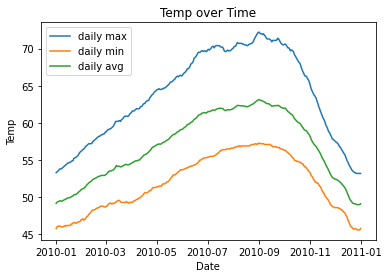

,temp,daily_avg,daily_min,daily_max
date,,,,
2010-01-01 00:00:00,47.8,49.170833,45.8,53.3
2010-01-01 01:00:00,47.4,NaN,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN,NaN
2010-01-01 05:00:00,45.8,NaN,NaN,NaN
2010-01-01 06:00:00,45.9,NaN,NaN,NaN
2010-01-01 07:00:00,45.9,NaN,NaN,NaN
2010-01-01 08:00:00,46.4,NaN,NaN,NaN


In [37]:

plt.plot(temp["daily_max"].dropna(),label="daily max")
plt.plot(temp["daily_min"].dropna(),label="daily min")
plt.plot(temp["daily_avg"].dropna(),label="daily avg")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temp")
plt.title("Temp over Time")
plt.show()

temp.head(10)

# Which month is the coldest, on average?

In [38]:
temp["monthly_avg"] = temp["temp"].resample('M').mean()
temp["monthly_min"] = temp["temp"].resample('M').min()
temp["monthly_max"] = temp["temp"].resample('M').max()
print(temp["monthly_avg"].dropna().sort_values().head(1))
temp[["monthly_max","monthly_min","monthly_avg"]].dropna().sort_values(["monthly_avg"]).head(5)

date
2010-01-31    49.98414
Name: monthly_avg, dtype: float64


,monthly_max,monthly_min,monthly_avg
date,,,
2010-01-31,56.2,45.8,49.984140
2010-12-31,57.5,45.6,50.498253
2010-02-28,58.6,46.9,52.243899
2010-03-31,61.3,48.7,53.956528
2010-11-30,65.0,48.6,55.185139


# Which month has the highest average temperature?

In [39]:
print(temp["monthly_avg"].dropna().sort_values(ascending=False).head(1))
temp[["monthly_max","monthly_min","monthly_avg"]].dropna().sort_values(["monthly_avg"],ascending=False).head(5)

date
2010-09-30    62.487083
Name: monthly_avg, dtype: float64


,monthly_max,monthly_min,monthly_avg
date,,,
2010-09-30,72.2,56.4,62.487083
2010-08-31,72.2,56.6,62.405376
2010-07-31,70.4,55.4,61.765457
2010-06-30,69.7,53.7,60.444722
2010-10-31,70.6,53.4,60.253091


# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [40]:
temp.head()

,temp,daily_avg,daily_min,daily_max,monthly_avg,monthly_min,monthly_max
date,,,,,,,
2010-01-01 00:00:00,47.8,49.170833,45.8,53.3,NaN,NaN,NaN
2010-01-01 01:00:00,47.4,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
daily = temp["temp"].resample('D').agg(["min","mean","max"])
daily["daily_delta"] = daily["max"] - daily["min"]
monthly = daily["daily_delta"].resample("M").agg(["min","mean","max"])
print(monthly.sort_values(by="max",ascending=False).head(1))
monthly.sort_values(by="max",ascending=False).head(4)

             min       mean   max
date                             
2010-08-31  13.5  13.870968  15.0


,min,mean,max
date,,,
2010-08-31,13.5,13.870968,15.0
2010-09-30,14.0,14.403333,14.9
2010-06-30,12.7,13.950000,14.8
2010-07-31,13.2,13.977419,14.8


# Use the dataset to answer the following questions:

In [42]:
weather = data.seattle_weather()
weather = weather.set_index('date').sort_index()
weather

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


# Which year and month combination has the highest amount of precipitation?


In [43]:
weather1 = weather.copy()
weather1.index.strftime("%Y-%b")
weather1["month_year"] = weather1.index.strftime("%Y-%b")
weather1.groupby("month_year").sum().precipitation.idxmax(),weather1.groupby("month_year").sum().precipitation.max()


('2015-Dec', 284.5)

In [44]:
weather_monthly = weather[["precipitation","temp_max","temp_min","wind"]].resample("M").agg(["min","mean","max"])
weather_monthly = weather_monthly.rename(columns={"precipitation":"monthly_precipitation",
                                "temp_max":"monthly_temp_max",
                                "temp_min":"monthly_temp_min",
                                "wind":"monthly_wind"})

weather_yearly = weather[["precipitation","temp_max","temp_min","wind"]].resample("Y").agg(["min","mean","max"])
weather_yearly = weather_yearly.rename(columns={"precipitation":"yearly_precipitation",
                                                  "temp_max":"yearly_temp_max",
                                                  "temp_min":"yearly_temp_min",
                                                  "wind":"yearly_wind"})

temp=pd.concat([weather,weather_monthly,weather_yearly],axis=1)
temp.bfill(inplace=True)
temp[temp[('yearly_precipitation', 'max')]==temp[('yearly_precipitation', 'max')].max()][temp[('monthly_precipitation', 'max')]==temp[('monthly_precipitation', 'max')].max()].head(1)

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_21181/2520019505.py:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,precipitation,temp_max,temp_min,wind,weather,"(monthly_precipitation, min)","(monthly_precipitation, mean)","(monthly_precipitation, max)","(monthly_temp_max, min)","(monthly_temp_max, mean)",...,"(yearly_precipitation, max)","(yearly_temp_max, min)","(yearly_temp_max, mean)","(yearly_temp_max, max)","(yearly_temp_min, min)","(yearly_temp_min, mean)","(yearly_temp_min, max)","(yearly_wind, min)","(yearly_wind, mean)","(yearly_wind, max)"
date,,,,,,,,,,,,,,,,,,,,,
2015-03-01,0.0,11.1,1.1,2.2,sun,0.0,3.66129,55.9,10.6,14.377419,...,55.9,1.7,17.427945,35.0,-3.8,8.835616,18.3,0.5,3.159726,8.0


# Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

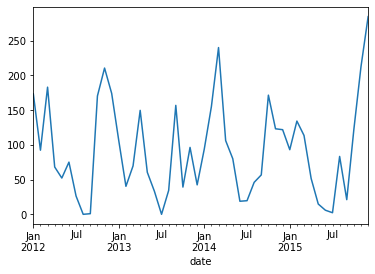

In [45]:
weather1.resample("M").sum().precipitation.plot()

In [46]:
fig = px.line(weather.resample("M").mean(),y="precipitation",title="precipitation over time (monthly)")
fig.show()

# Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

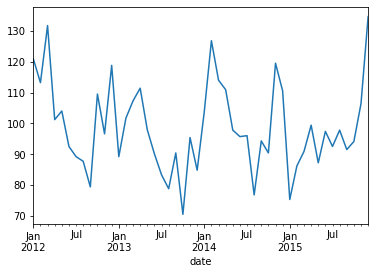

In [47]:
weather1.resample("M").sum().wind.plot()

In [48]:
fig = px.line(weather.resample("M").mean(),y="wind",title="wind over time (monthly)")
fig.show()

# Which year-month combination is the windiest?


In [49]:
weather1.groupby("month_year").sum().wind.idxmax(),weather1.groupby("month_year").sum().wind.max()

('2015-Dec', 134.6)

In [50]:

temp[temp[('yearly_wind', 'max')]==temp[('yearly_wind', 'max')].max()][temp[('monthly_wind', 'max')]==temp[('monthly_wind', 'max')].max()].head(1)

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_21181/841174110.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,precipitation,temp_max,temp_min,wind,weather,"(monthly_precipitation, min)","(monthly_precipitation, mean)","(monthly_precipitation, max)","(monthly_temp_max, min)","(monthly_temp_max, mean)",...,"(yearly_precipitation, max)","(yearly_temp_max, min)","(yearly_temp_max, mean)","(yearly_temp_max, max)","(yearly_temp_min, min)","(yearly_temp_min, mean)","(yearly_temp_min, max)","(yearly_wind, min)","(yearly_wind, mean)","(yearly_wind, max)"
date,,,,,,,,,,,,,,,,,,,,,
2012-12-01,4.1,13.3,8.3,5.5,rain,0.0,5.612903,22.6,3.3,7.235484,...,54.1,-1.1,15.276776,34.4,-3.3,7.289617,18.3,1.0,3.40082,9.5


# What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)


In [51]:
weather1["is_sunny"] = weather1["weather"]=="sun"

weather1.groupby(weather1.index.year).sum().is_sunny.idxmax(),weather1.groupby(weather1.index.year).sum().is_sunny.max()

(2014, 211)

In [52]:
print(temp[temp["weather"] == "sun"].resample("Y").count().sort_values(by="weather",ascending=False)["weather"].head(1))
temp[temp["weather"] == "sun"].resample("Y").count().sort_values(by="weather",ascending=False)["weather"]

date
2014-12-31    211
Name: weather, dtype: int64


date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: weather, dtype: int64

# In which month does it rain the most?


In [53]:
weather1["is_rainy"] = weather1["weather"]=="rain"

weather1.groupby(weather1.index.month).sum().is_rainy.idxmax(),weather1.groupby(weather1.index.month).sum().is_rainy.max()

(2, 40)

In [54]:
temp["month"] = temp.index.month
temp[["month","precipitation"]].groupby("month").agg(["mean","max"]).sort_values([("precipitation","mean")],ascending=False).head(3)

precipitation      
               mean   max
month                    
11         5.354167  54.1
12         5.021774  54.1
3          4.888710  55.9

# Which month has the most number of days with a non-zero amount of precipitation?

In [55]:
weather1["is_precip"] = weather1.precipitation>0

weather1.groupby(weather1.index.month).sum().is_precip.idxmax(),weather1.groupby(weather1.index.month).sum().is_precip.max()

(12, 81)

In [56]:
print(temp[temp["precipitation"] > 0 ].resample("M").count().sort_values(by="precipitation",ascending=False)["precipitation"].head(1))
temp[temp["precipitation"] > 0 ].resample("M").count().sort_values(by="precipitation",ascending=False)["precipitation"].head(5)

date
2012-12-31    27
Name: precipitation, dtype: int64


date
2012-12-31    27
2015-12-31    25
2012-01-31    22
2012-03-31    22
2015-11-30    20
Name: precipitation, dtype: int64

# Next

In [57]:
flights = data.flights_20k()
flights1=flights.copy()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


# Convert any negative delays to 0.


In [58]:
flights1 = flights1.set_index('date').sort_index()
flights1.delay = np.where(flights1.delay < 0,0,flights1.delay)

In [59]:
flights.delay = np.where(flights.delay < 0,0,flights.delay)
flights = flights.set_index('date').sort_index()
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


# Which hour of the day has the highest average delay?


In [64]:
flights1["hour"] = flights1.index.hour
flights1.groupby("hour").mean().delay.idxmax(),flights1.groupby("hour").mean().delay.max()

(3, 302.5)

In [60]:
flights_by_hr = flights.resample("H").mean().dropna()
flights_by_hr["hour"] = flights_by_hr.index.hour
flights_by_hr[["delay","hour"]].groupby("hour").agg(["mean"]).sort_values(by=[("delay","mean")],ascending=False).head(3)

,delay
,mean
hour,
3,302.50
1,170.00
0,124.35


# Does the day of the week make a difference in the delay amount?


In [65]:
flights1["weekday"] = flights1.index.day_of_week
flights1.groupby("weekday").mean().delay.idxmax(),flights1.groupby("weekday").mean().delay.max()

(4, 17.75759577278732)

In [61]:
flights_by_day = flights.resample("D").mean().dropna()
flights_by_day["day"] = flights_by_day.index.day_of_week
print("yes")
flights_by_day[["delay","day"]].groupby(["day"]).mean().sort_values(by="delay",ascending=False)

yes


,delay
day,
4,17.798288
3,12.979704
2,11.094962
6,10.437336
1,9.450928
5,8.589921
0,7.272184


# Does the month make a difference in the delay amount?

In [66]:
flights1.groupby(flights1.index.month_name()).mean().delay.idxmax(),\
    flights1.groupby(flights1.index.month_name()).mean().delay.max()

('February', 12.306106138107417)

In [62]:
flights_by_month = flights.resample("M").mean().dropna()
flights_by_month["month"] = flights_by_month.index.month
print("yes")
flights_by_month.sort_values(by="delay",ascending=False)[["delay",'month']]

yes


,delay,month
date,,
2001-02-28,12.306106,2
2001-01-31,11.301592,1
2001-03-31,9.875287,3
